## FT084 - Introdução a Mineração de Dados
---
### Tarefa 01: Árvores de Decisão  

Este código tem por objetivo a resolução de uma das etapas da tarefa em questão, que consiste na implementação de um algoritmo de classificação (árvore de decisão) e a análise dos resultados obtidos.  
Instruções para o experimento:
1. Separe 80% das amostras para treinamento e 20% para testes. A escolha das amostras que farão parte dos conjuntos de treinamento e teste deve ser feita **aleatoriamente, garantindo que, nos dados de teste, existam amostras de _todas_ as classes.**
2. Apresente a árvore obtida e os erros de classificação para os conjuntos de treinamento e testes.
3. _Repita_ o experimento, fazendo uma nova partição entre amostras de treinamento e testes. Os erros foram idênticos? Comente.

---

#### 1) Importação das bibliotecas  
Serão utilizados alguns pacotes para a implementação do código. São eles:
- pandas: leitura dos arquivos
- numpy, scipy: cálculo de algumas estatísticas
- sklearn: separação dos dados entre treino e teste, transformação dos atributos categóricos para numéricos (caso necessário), matriz de confusão e avaliação do erro
- graphviz, io, IPython e pydotplus: visualização da árvore
- matplotly.pyplot e plotly: visualizações extras

In [45]:
# Importação das Bibliotecas
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
import plotly.express as px

#### 2) Criação do dataset
Será gerado um objeto do tipo dataframe com a base de dados wine.data, utilizando os nomes dos atributos disposíveis em wine.names.

In [2]:
# Lista de nomes das colunas, sendo o primeiro aquele que desejamos classificar.
columns_names = [
    'Wine', 
    'Alcohol', 
    'Malic acid', 
    'Ash', 
    'Alcalinity of ash', 
    'Magnesium', 'Total phenols', 
    'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 
    'Color intensity', 
    'Hue', 
    'OD280/OD315 of diluted wines', 
    'Proline']

In [3]:
# Criação do dataset
dataset = pd.read_table("wine.data", sep = ",", header = None, names = columns_names)
dataset

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#### 3) Análise da base de dados
Analisar o tipo dos dados da base (numéricos ou categóricos), se há valores faltantes, e se é necessário realizar alguma transformação prévia.

In [4]:
# Observando o tamanho da base de dados
dataset.shape

(178, 14)

In [5]:
# Utilizando o método describe() para analisar a base de dados e validar se todos os atributos são numéricos
dataset.describe()

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# Criando um vetor para verificar se há valores nulos
null_array = [dataset.iloc[:, i].isnull().unique() for i in range(13)]
null_array

[array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False])]

In [7]:
# Criando um vetor para verificar se há valores faltantes
na_array = [dataset.iloc[:, i].isna().unique() for i in range(13)]
na_array

[array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False])]

#### 4) Divisão entre Classe e Atributos
Definir dentro do dataset qual é a variável que será classificada, e quais são as variáveis preditoras.

In [8]:
# Definição das Classes
classes = dataset['Wine']

# Definição dos atributos
attributes_names = [
    'Alcohol', 
    'Malic acid', 
    'Ash', 
    'Alcalinity of ash', 
    'Magnesium', 'Total phenols', 
    'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 
    'Color intensity', 
    'Hue', 
    'OD280/OD315 of diluted wines', 
    'Proline']

attributes = dataset[attributes_names]

#### 5) Separação dos Dados
Aqui, os dados serão separados em treinamento e teste. O parâmetro *test_size* será definido primeiramente como 0.2 (20%) de acordo com o enunciado da tarefa.

In [9]:
# Divisão da base de dados entre treinamento e teste. Random_state = 0 para sempre obter a mesma divisão da base quando o código for executado.
x_train, x_test, y_train, y_test = train_test_split(attributes, classes, test_size = 0.2, random_state = 0)

#### 6) Criação do Modelo
Será utilizado o modelo DecisionTreeClassifier().

In [10]:
# Criação e treinamento do modelo
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

#### 7) Plotagem da Árvore
Visualização da árvore de decisão gerada pelo algoritmo.

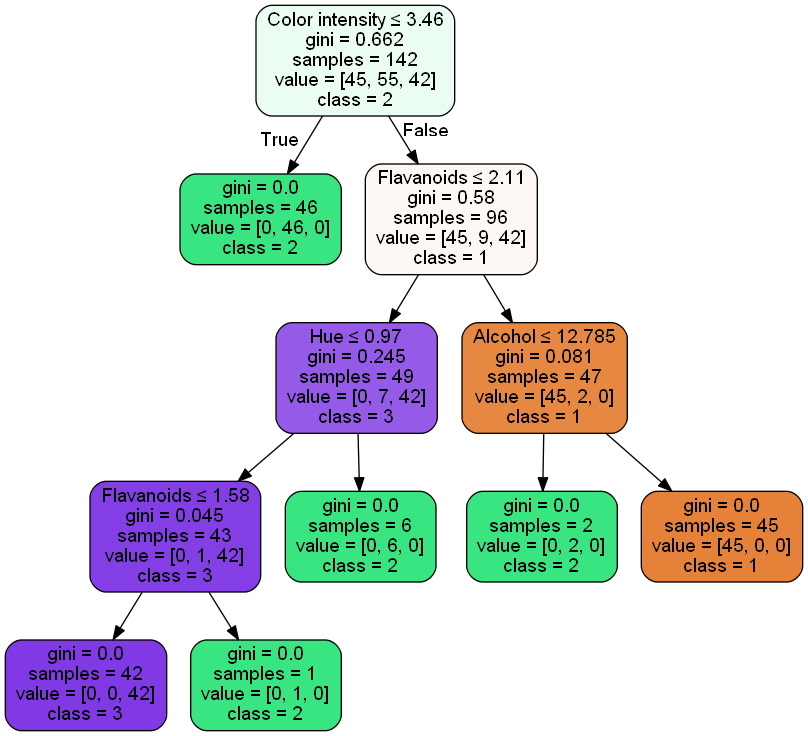

In [11]:
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = attributes_names,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore.png')
Image(graph.create_png())

#### 8) Avaliação do Modelo
Será gerado um vetor de previsões com os dados de teste. Em seguida, será obtida a matriz de confusão com os resultados obtidos. Por fim, será feita uma análise da taxa de acerto.

In [12]:
# Previsão dos valores
prediction = decision_tree.predict(x_test)
prediction

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [13]:
# Gerando a Matriz de confusão
confusion = confusion_matrix(y_test, prediction)
confusion

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

In [14]:
# Avaliando a precisão do modelo
precision = accuracy_score(y_test, prediction)
precision

0.9722222222222222

In [15]:
# Explicitando a taxa de erro
error = 1 - precision
error

0.02777777777777779

#### 9) Precisão do Erro
Serão realizadas N repetições do experimento, a fim de obter a média dos erros de todas as iterações, chegando a um valor mais preciso.

In [33]:
# Encapsulando o processo dentro de uma função
def error_generator(test_size_value):
    x_train_analysis, x_test_analysis, y_train_analysis, y_test_analysis = train_test_split(attributes, classes, test_size = test_size_value, random_state = None)
    decision_tree_analysis = DecisionTreeClassifier()
    decision_tree_analysis.fit(x_train_analysis, y_train_analysis)
    prediction_analysis = decision_tree_analysis.predict(x_test_analysis)
    confusion_analysis = confusion_matrix(y_test_analysis, prediction_analysis)
    precision_analysis = accuracy_score(y_test_analysis, prediction_analysis)
    error_analysis = 1 - precision_analysis
    return error_analysis

In [41]:
# Criação de um vetor que irá armazenar os valores dos erros
total = 1000
partial_error = [error_generator(0.2) for i in range(total)]

In [46]:
# Obtendo algumas estatísticas do vetor
stats.describe(partial_error)

DescribeResult(nobs=1000, minmax=(0.0, 0.33333333333333337), mean=0.0938888888888889, variance=0.0024156872922305008, skewness=0.5661849919820486, kurtosis=0.6538232210240915)

{'whiskers': [<matplotlib.lines.Line2D at 0x2274d288f40>,
 'caps': [<matplotlib.lines.Line2D at 0x2274d2aef40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2274b9860a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2274d2ab130>],
 'fliers': [<matplotlib.lines.Line2D at 0x2274aed62e0>],
 'means': []}

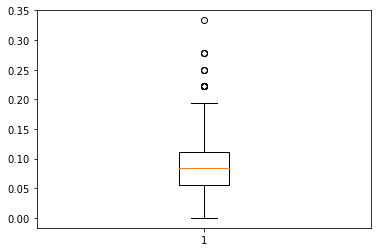

In [47]:
# Plotando um boxplot
plt.boxplot(partial_error)

#### 10) Alterando a Amostra de Testes
Aqui, serão utilizados diferentes valores para a amostra de teste, a fim de analisar o impacto desse parâmetro no erro do modelo.

In [35]:
# Criação de dois vetores para armazenar os valores de amostra de teste, resultado parcial de erro e resultado final de erro
test_size_array = []
partial_error = []
error_array = []

# Definindo o intervalo de testes (utilizando números inteiros para posterior conversão)
min_test_size = 10
max_test_size = 90

In [22]:
# Realizando os testes e armazenando os resultados nos vetores
'''
Nota-se que o valor da amostra de treino é 1 - (amostra de teste).
Quando o parâmetro test_size_value for igual a 0.3 (30%), por exemplo, significa que o modelo será treinado com 70% dos dados da base.
Logo, aumentar o valor de test_size_value significa diminuir o valor da amostra para treino.
''' 

for i in range(min_test_size, max_test_size+1):
    # Convertendo em decimal
    size = i/100
    test_size_array.append(size)
    # Realizando 100 experimentos por tamanho de amostra
    for j in range(100):
        partial_error.append(error_generator(size))
    # Adicionando ao vetor de erros a média de cada experimento
    error_array.append(np.mean(partial_error))
    partial_error = []

In [23]:
# Transformando os vetores em um DataFrama
analysis_dataframe = pd.DataFrame(list(zip(test_size_array, error_array)), columns = ['Tamanho da Amostra de Testes', 'Erro do Modelo'])

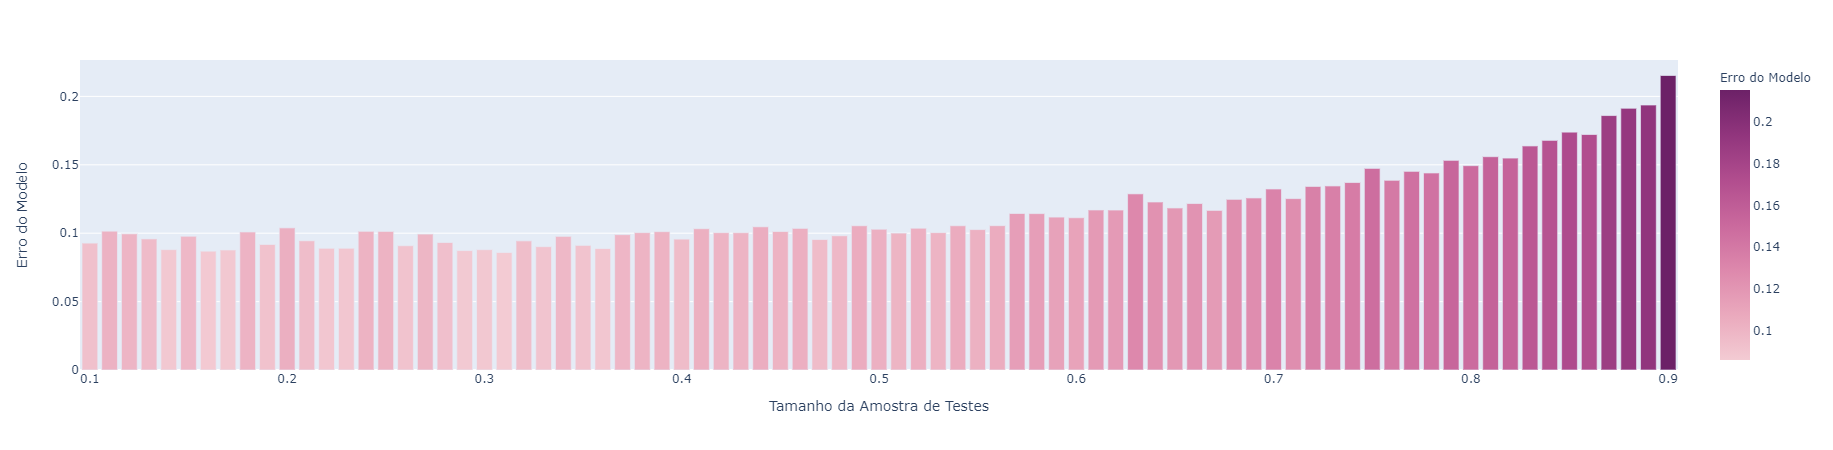

In [32]:
# Plotando os resultados
figure2 = px.bar(analysis_dataframe, 
                 y = 'Erro do Modelo', 
                 x = 'Tamanho da Amostra de Testes', 
                 labels={'y':'Valor do Erro', 'x':'Tamanho da Amostra de Teste'},
                 hover_data = ['Erro do Modelo'], 
                 color = 'Erro do Modelo',
                 color_continuous_scale = 'magenta')
figure2.show()